<a href="https://colab.research.google.com/github/DEBASHISDUTTA/skills-introduction-to-github/blob/main/Mod_4_Multi_stock_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from io import BytesIO

# Create a presentation
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Title Only layout

# Slide 1 - Walmart 10-K Summary
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Walmart 10-K Summary (Fiscal Year Ended January 31, 2024)"

# Add summary content
summary = (
    "• Walmart reported consolidated net income of $16.27B in FY2024, a 44% YoY increase over $11.29B in FY2023.\n"
    "• Total revenue reached $648.1B, with Walmart U.S. contributing 69%, International 18%, and Sam’s Club 13%.\n"
    "• Strategic focus: Omnichannel transformation, supply chain automation, and digital expansion.\n"
    "• Key risks: Cybersecurity, supply chain disruption, climate change, compliance, and economic volatility.\n"
    "• Overall financial sentiment: Positive – driven by profitability recovery, eCommerce growth, and strong operational execution.\n"
    "• ESG commitment: Zero emissions by 2040, enhanced equity and inclusion, and digital workforce investment.\n"
    "• Robust dividend and share repurchase program continues to support shareholder returns."
)

left = Inches(0.5)
top = Inches(1.5)
width = Inches(9)
height = Inches(5.5)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.word_wrap = True
p = tf.add_paragraph()
p.text = summary
p.font.size = Pt(14)
p.font.name = 'Calibri'
p.font.color.rgb = RGBColor(0, 0, 0)

# Save to a BytesIO object
pptx_io = BytesIO()
prs.save(pptx_io)
pptx_io.seek(0)  # Move to beginning of the stream
pptx_io.name = "Walmart_10K_Summary_FY2024.pptx"

pptx_io


ModuleNotFoundError: No module named 'pptx'

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
file_path = "stock_prices.csv"  # Ensure this file is in your working directory
stock_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Create Plotly figure
fig = go.Figure()

# Add traces for selected stocks (first 5 for clarity)
for column in stock_data.columns[1:6]:
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data[column],
        mode='lines',
        name=column
    ))

# Customize layout
fig.update_layout(
    title='Interactive Stock Price Trends',
    xaxis_title='Date',
    yaxis_title='Stock Price (Normalized/Adjusted)',
    template='plotly_white',
    hovermode='x unified',
    legend_title='Stock Symbols',
    width=1000,
    height=600
)

# Show the figure
fig.show()


In [4]:
# Drop rows with any missing values
stock_data_cleaned = stock_data.dropna()

# Verify that all missing values are removed
missing_after_cleanup = stock_data_cleaned.isnull().sum().sum()
missing_after_cleanup


np.int64(0)

In [5]:
# Perform statistical analysis on the cleaned dataset (excluding the 'Date' column)
stat_summary = stock_data_cleaned.describe().T

# Add additional metrics: range, coefficient of variation
stat_summary['range'] = stat_summary['max'] - stat_summary['min']
stat_summary['cv (%)'] = (stat_summary['std'] / stat_summary['mean']) * 100  # Coefficient of Variation in percentage

# Round for readability
stat_summary_rounded = stat_summary.round(2)
stat_summary_rounded


,count,mean,min,25%,50%,75%,max,std,range,cv (%)
Date,2256,2018-06-26 19:07:39.574468352,2014-01-02 00:00:00,2016-03-31 18:00:00,2018-06-26 12:00:00,2020-09-22 06:00:00,2022-12-16 00:00:00,NaN,3270 days 00:00:00,NaN
AMZN,2256.0,80.338734,14.3475,33.220874,80.042004,118.563875,186.570496,52.316769,172.222996,65.120231
CAT,2256.0,121.652301,48.302227,78.244806,116.459213,147.10881,237.259995,51.385835,188.957767,42.23992
DE,2256.0,168.989855,63.554581,77.565088,136.771057,212.776894,445.609985,108.424402,382.055405,64.160302
EXC,2256.0,25.844283,13.913108,19.522686,24.284109,30.300213,49.096313,7.889502,35.183206,30.527067
GOOGL,2256.0,63.594338,24.853001,37.442126,54.352251,77.608875,149.838501,34.080856,124.9855,53.591022
JNJ,2256.0,119.45516,67.982193,91.151041,117.965538,139.99028,182.411407,30.328336,114.429215,25.388888
JPM,2256.0,89.493816,42.061626,54.218814,91.504726,113.086323,166.523987,34.310949,124.46236,38.338905
META,2256.0,169.194437,53.529999,109.934998,164.299995,201.755005,382.179993,77.699835,328.649994,45.923398
PFE,2256.0,31.341115,19.486582,24.72508,29.19754,35.053536,59.323399,8.730489,39.836817,27.856345


In [7]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=stat_summary_rounded)

MessageError: Error: credential propagation was unsuccessful

In [8]:
from google.colab import auth
auth.authenticate_user()

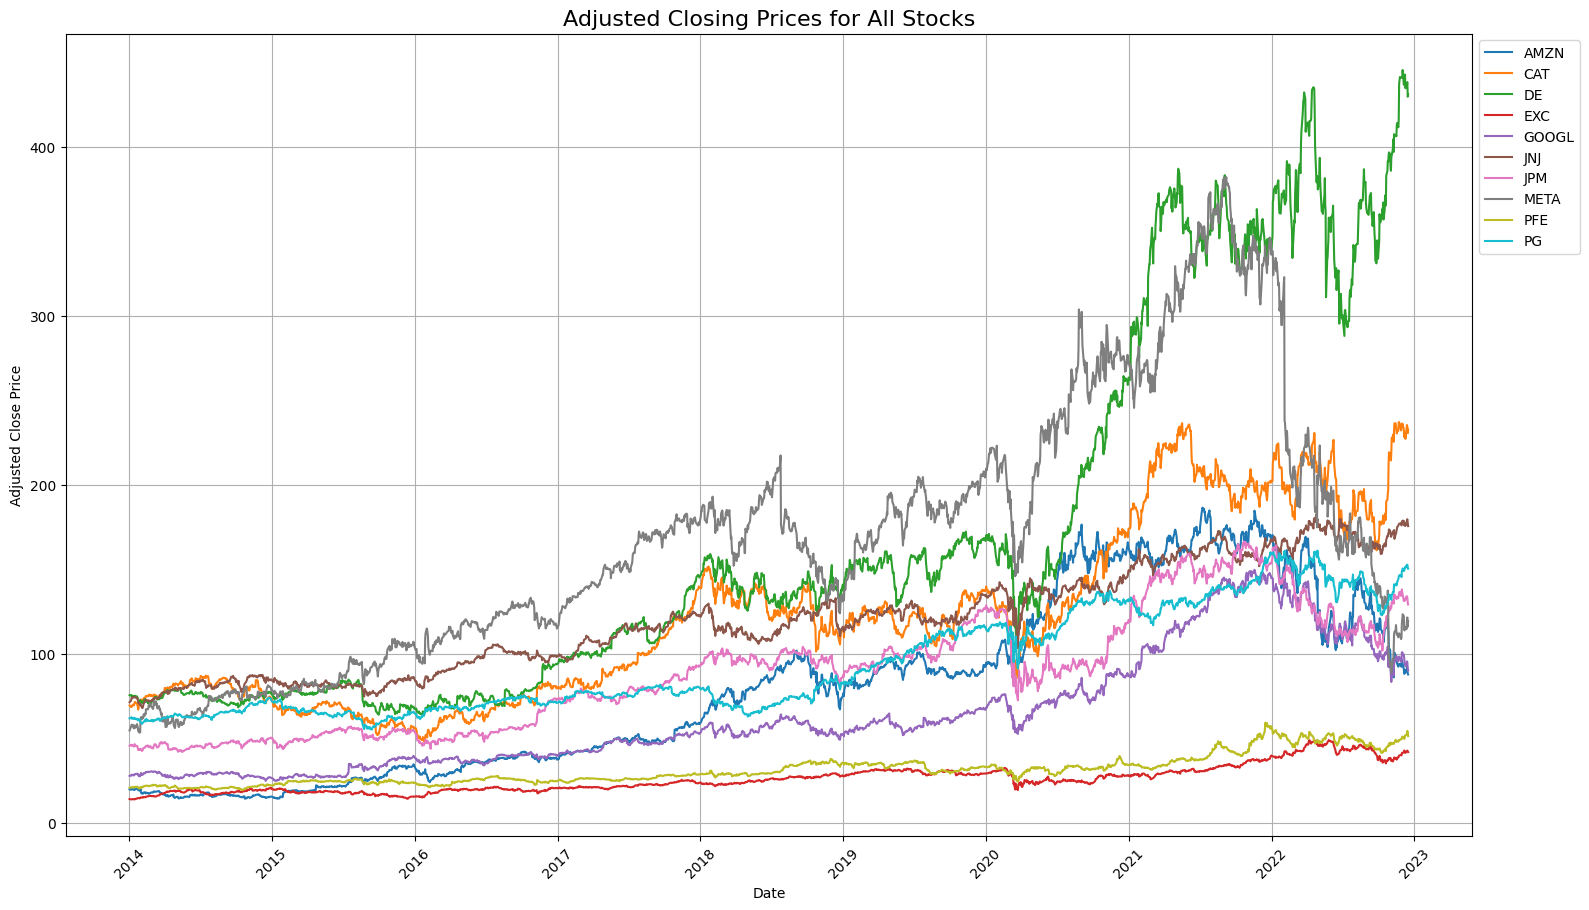

In [10]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'

plt.figure(figsize=(16, 9))
for column in stock_data_cleaned.columns[1:]:
    plt.plot(stock_data_cleaned['Date'], stock_data_cleaned[column], label=column)

plt.title('Adjusted Closing Prices for All Stocks', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

                AMZN       CAT        DE       EXC     GOOGL       JNJ  \
Date                                                                     
2014-01-06 -0.010905 -0.013686 -0.003878 -0.013986  0.003773  0.014281   
2014-01-07  0.011178  0.003271  0.004449  0.005226  0.019278  0.021228   
2014-01-08  0.009773  0.002362 -0.010741 -0.002228  0.002081 -0.001379   
2014-01-09 -0.002264  0.006395 -0.004030  0.005954 -0.009630  0.006053   
2014-01-10 -0.008354  0.008917  0.008766  0.005180 -0.000053  0.000106   

                 JPM      META       PFE        PG  
Date                                                
2014-01-06  0.013572  0.045513  0.002955  0.001242  
2014-01-07 -0.011525  0.012587  0.006219  0.009673  
2014-01-08  0.009431  0.005352  0.006832 -0.014492  
2014-01-09 -0.001869 -0.017345 -0.000646  0.002243  
2014-01-10 -0.004595  0.012583 -0.007759 -0.001492  


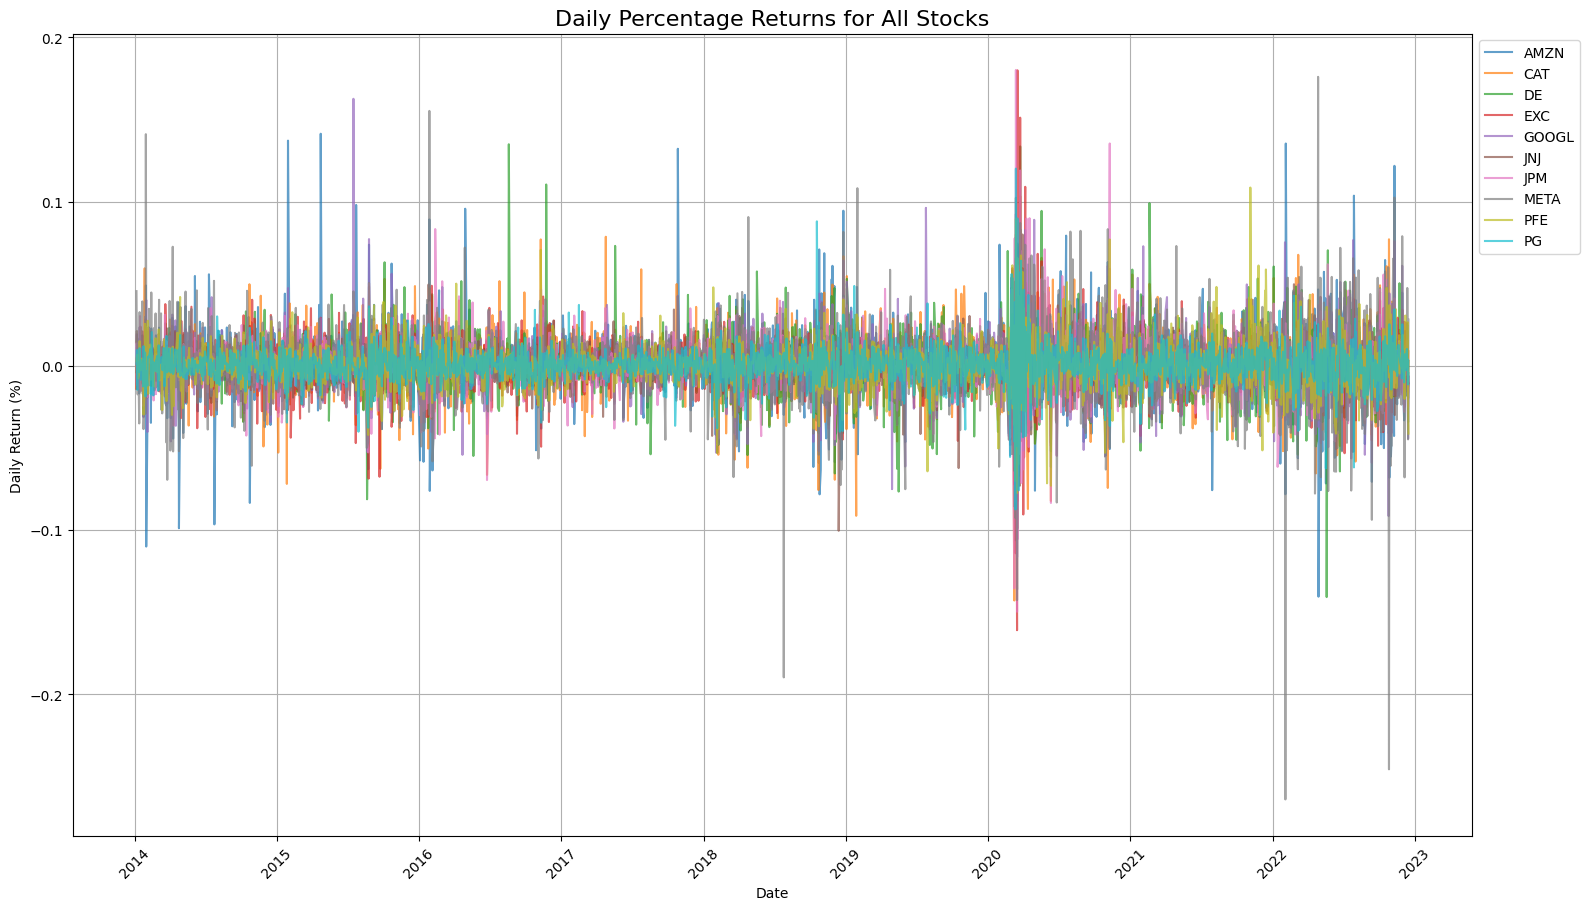

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned stock data
stock_data = pd.read_csv("stock_prices.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(inplace=True)

# Set 'Date' as index for timeseries operations
stock_data.set_index('Date', inplace=True)

# Calculate daily percentage returns
returns = stock_data.pct_change().dropna()

# Display the first few rows of the returns DataFrame
print(returns.head())

# Plot percentage returns for all stocks
plt.figure(figsize=(16, 9))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column, alpha=0.7)

plt.title("Daily Percentage Returns for All Stocks", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


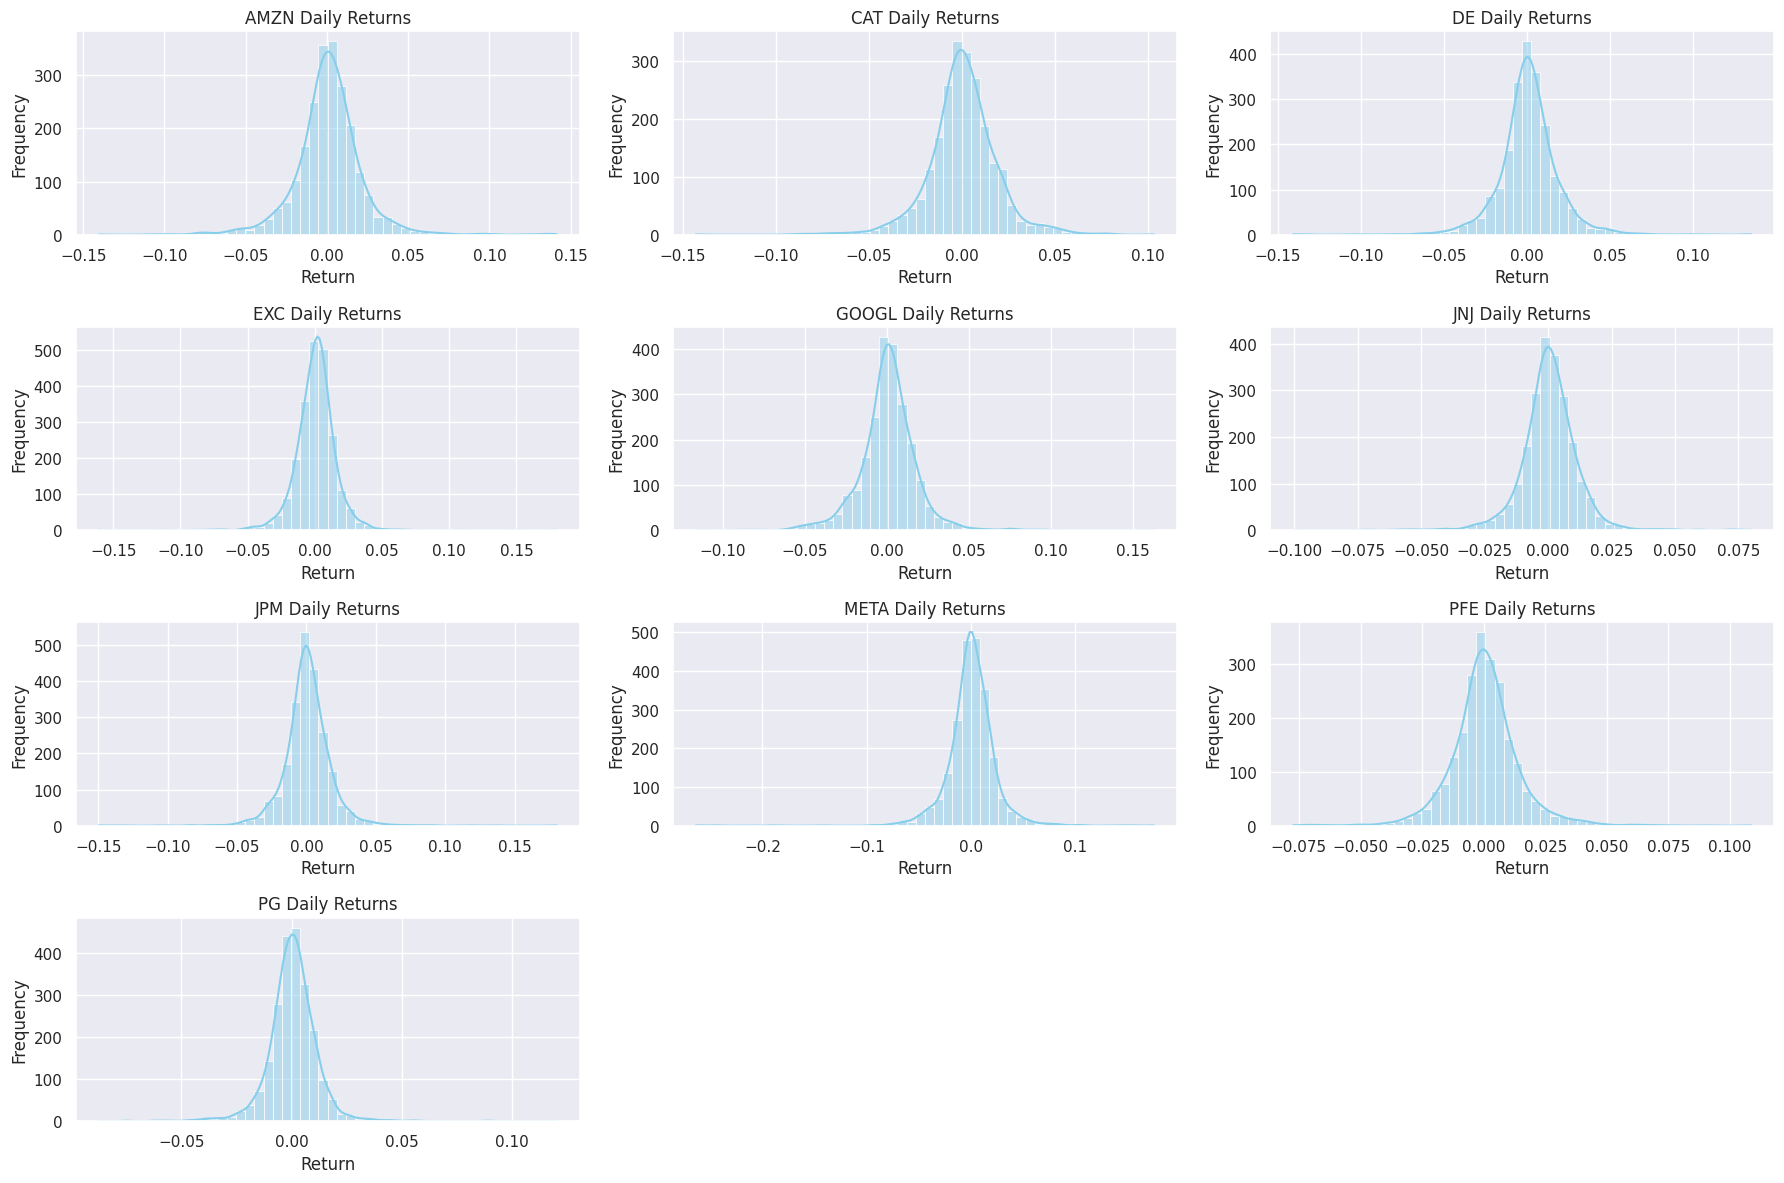

In [12]:
# Calculate daily percentage returns again for internal processing
stock_returns = stock_data_cleaned.set_index('Date').pct_change().dropna()

# Set plot aesthetics
sns.set(style="darkgrid")
plt.figure(figsize=(18, 12))

# Create histograms for each stock's daily return
for i, column in enumerate(stock_returns.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(stock_returns[column], bins=50, kde=True, color='skyblue')
    plt.title(f'{column} Daily Returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


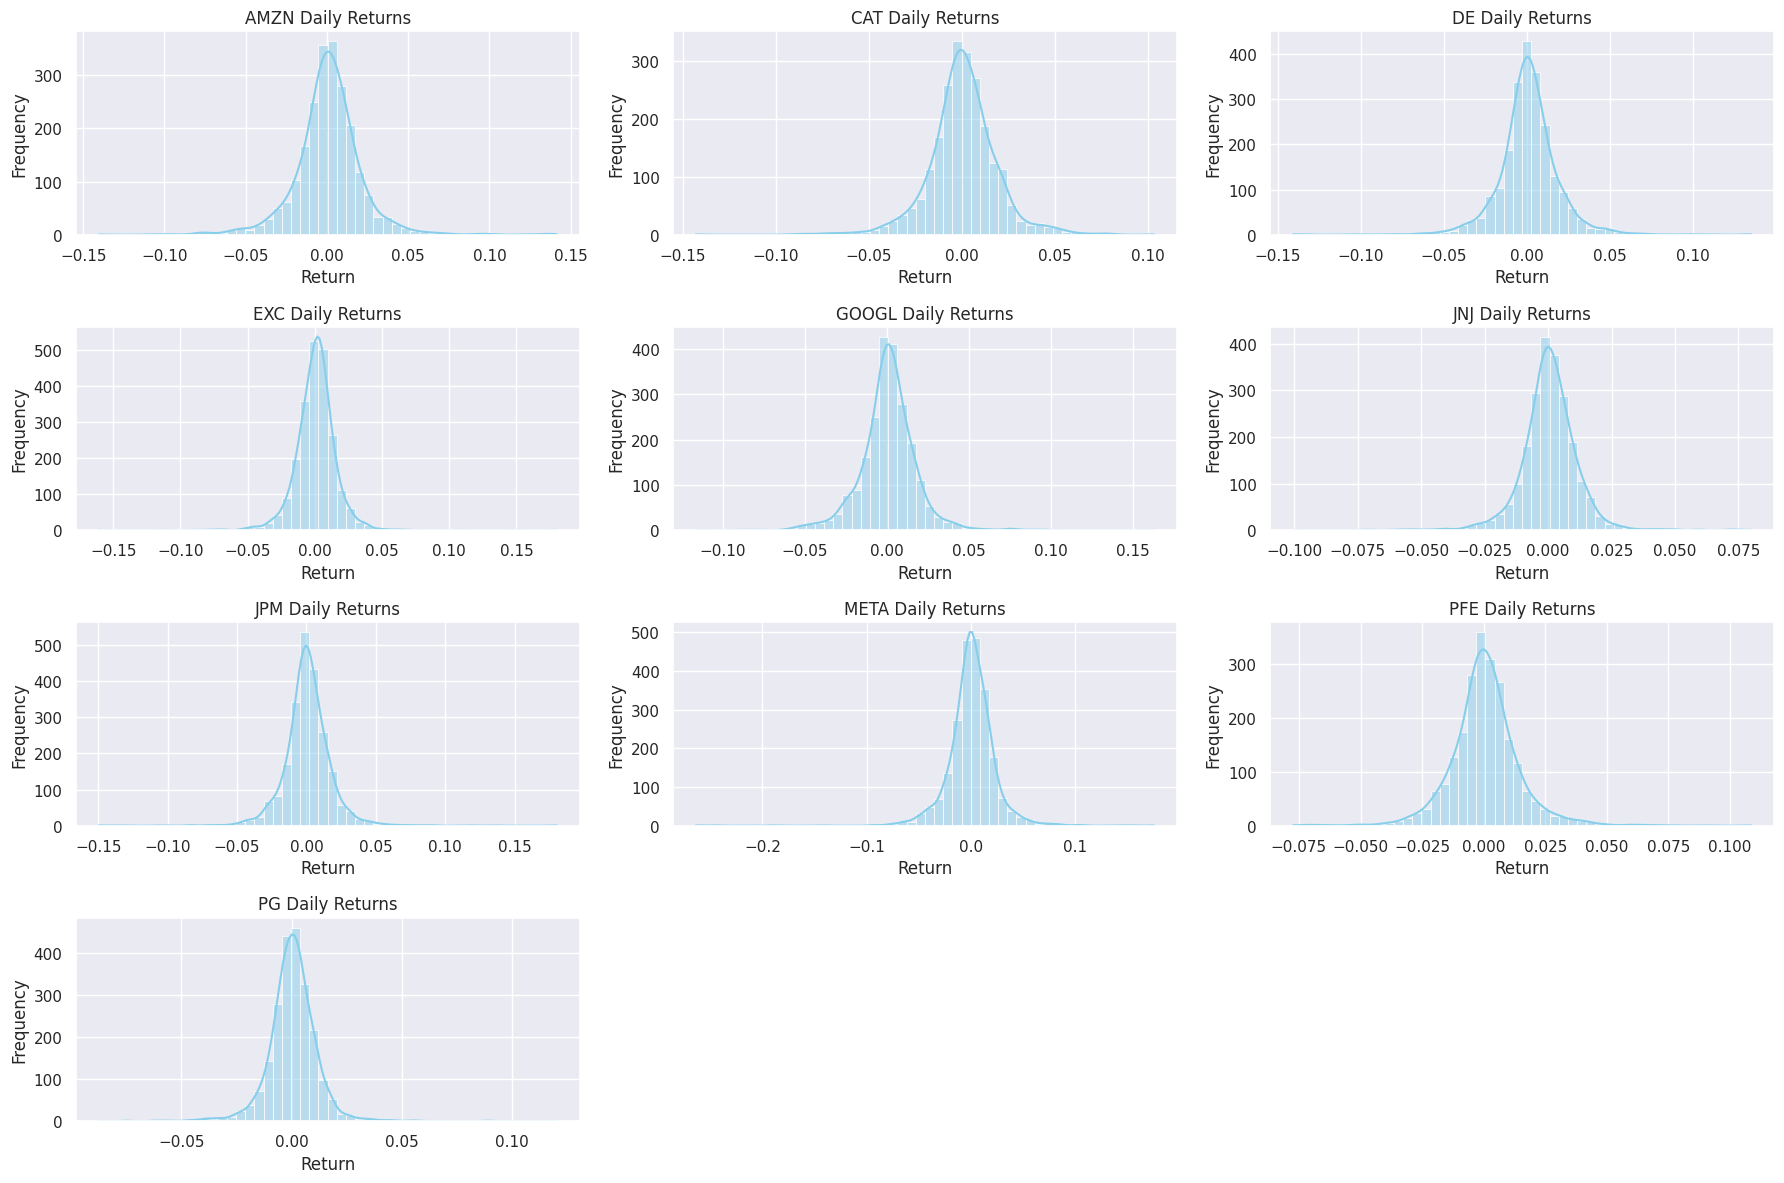

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
stock_data = pd.read_csv("stock_prices.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(inplace=True)

# Calculate daily returns
stock_returns = stock_data.set_index('Date').pct_change().dropna()

# Plot histograms
sns.set(style="darkgrid")
plt.figure(figsize=(18, 12))

for i, column in enumerate(stock_returns.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(stock_returns[column], bins=50, kde=True, color='skyblue')
    plt.title(f'{column} Daily Returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


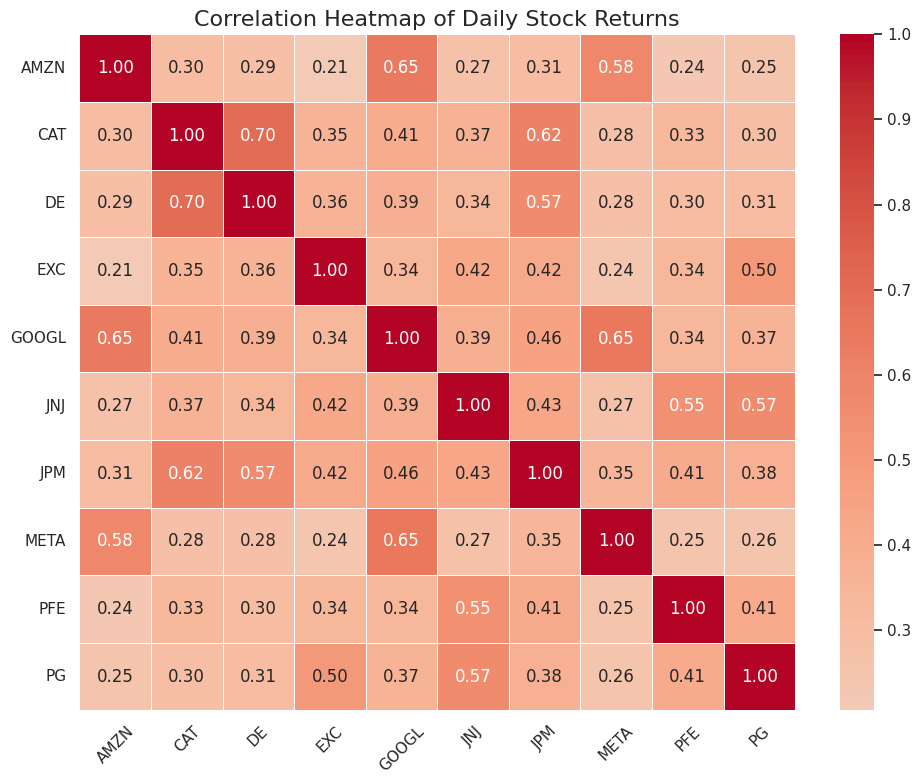

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
stock_data = pd.read_csv("stock_prices.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(inplace=True)

# Calculate daily percentage returns
returns = stock_data.set_index('Date').pct_change().dropna()

# Compute the correlation matrix
corr_matrix = returns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Daily Stock Returns', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


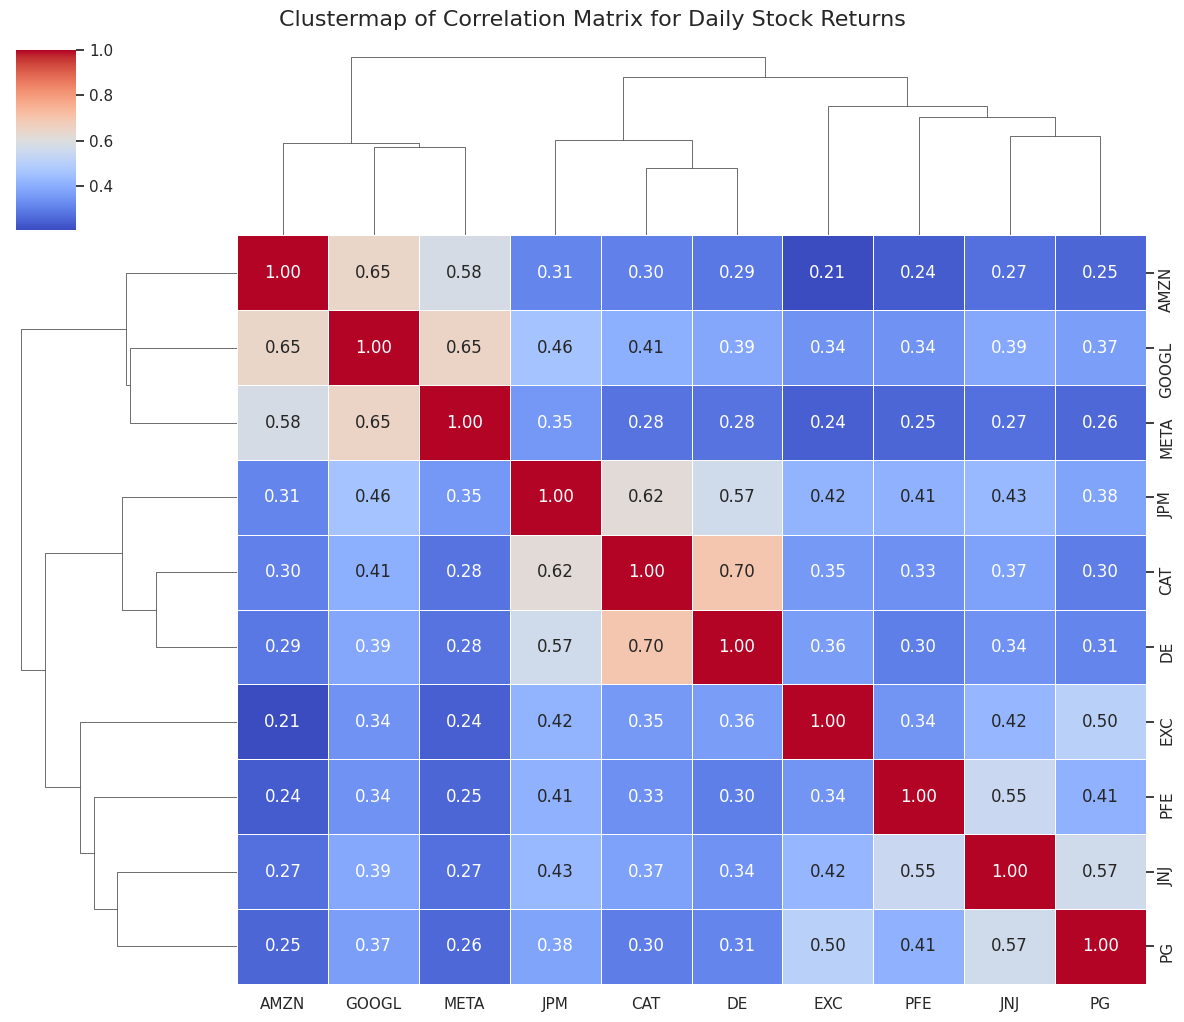

In [15]:
# Recalculate the daily returns for safety
returns = stock_data_cleaned.set_index('Date').pct_change().dropna()

# Compute the correlation matrix
correlation_matrix = returns.corr()

# Plot a clustermap to reveal groupings among stocks
sns.clustermap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(12, 10),
    fmt=".2f"
)
plt.suptitle('Clustermap of Correlation Matrix for Daily Stock Returns', fontsize=16, y=1.02)
plt.show()


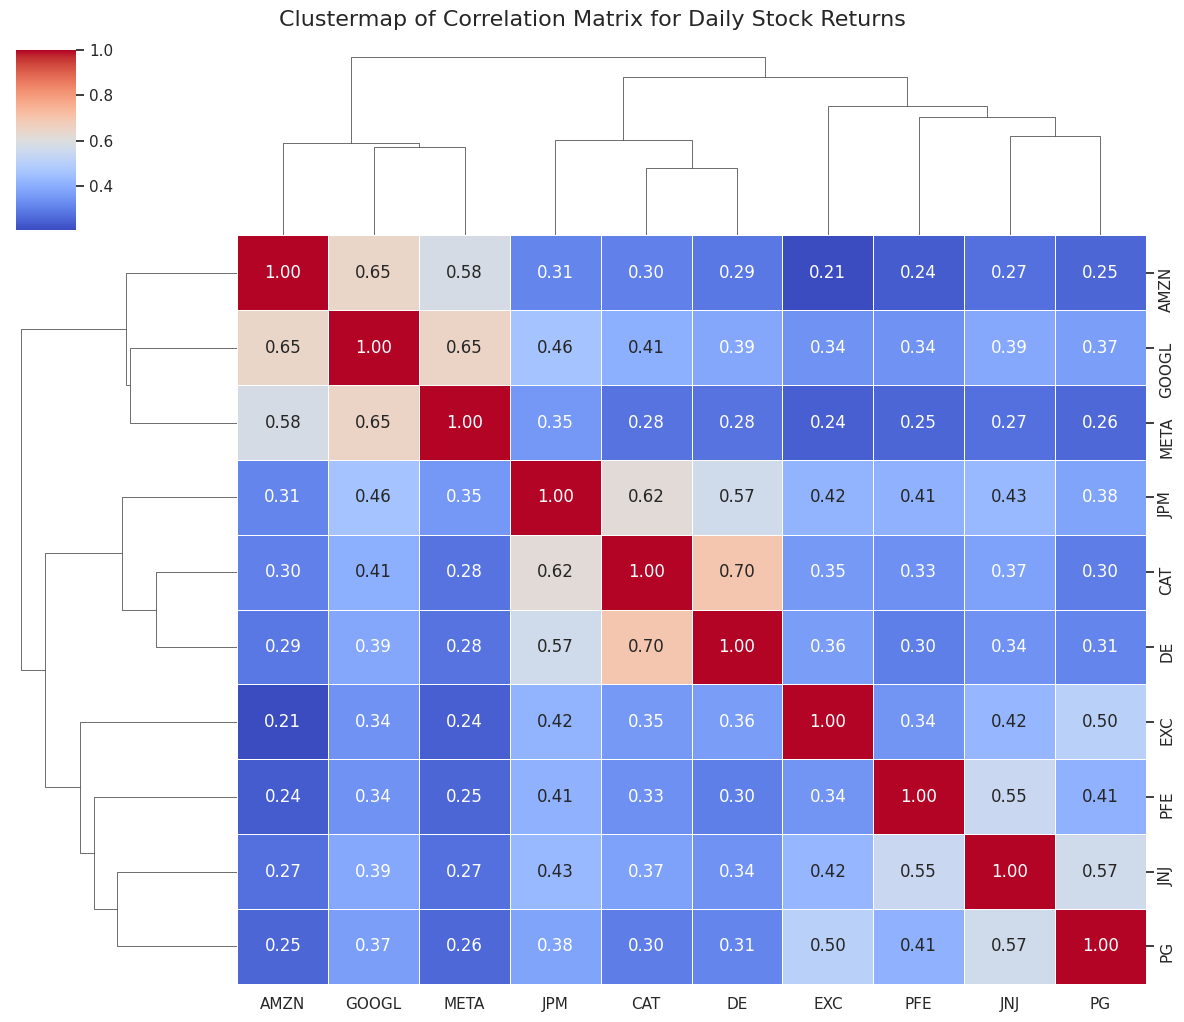

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
stock_data = pd.read_csv("stock_prices.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(inplace=True)

# Calculate daily returns
returns = stock_data.set_index('Date').pct_change().dropna()

# Compute the correlation matrix
correlation_matrix = returns.corr()

# Plot clustermap
sns.clustermap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(12, 10),
    fmt=".2f"
)
plt.suptitle('Clustermap of Correlation Matrix for Daily Stock Returns', fontsize=16, y=1.02)
plt.show()
